# Exploratory Data Analysis for the Credit Card Dataset

Importing Libraries

In [1]:
import sys
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scripts.data_loader import load_data
from scripts.preprocessing import Preprocessor
from scripts.plotter import Plotter

Loading the credit card Dataset

In [3]:
df = load_data('/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/raw/creditcard.csv/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Dataset Overview

- The dataset contains 284,807 rows and 31 columns. Out of these, 30 columns are numeric features (Time, V1–V28, Amount) and 1 column is the target variable (Class, integer).

- The dataset does not contain any missing values, making it complete and ready for analysis.

In [4]:
# Display the first few rows of the dataframe
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Cleaning


Removing Duplicate Data

In [5]:
# Initialize Preprocessor
preprocessor = Preprocessor(df)

In [6]:
preprocessor.remove_duplicates()

Removed 1081 duplicate rows


In [7]:
cleaned_df = preprocessor.df

- The dataset initially contained 1,081 duplicate rows, which were removed, resulting in a final dataset of 283,725 rows.

Statistical Summary

In [8]:
# Generate summary statistics
cleaned_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


- The dataset contains a total of 283,726 transactions. The features $\text{V1}$ through $\text{V28}$ are already scaled due to the PCA transformation, exhibiting small means and standard deviations. The $\text{Time}$ feature ranges from 0 to 172,792 seconds, and the $\text{Amount}$ feature shows extreme variability, with a maximum transaction of $25,691.16$ and a median of just $\text{88.47}$.

## Exploratory Data Analysis (EDA)

### Univariate analysis

In [9]:
# Initialize Plotter
plotter = Plotter(cleaned_df, figsize=(10, 6))

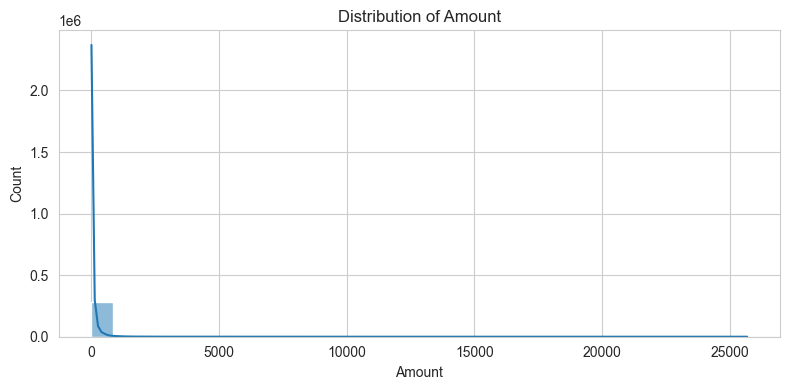

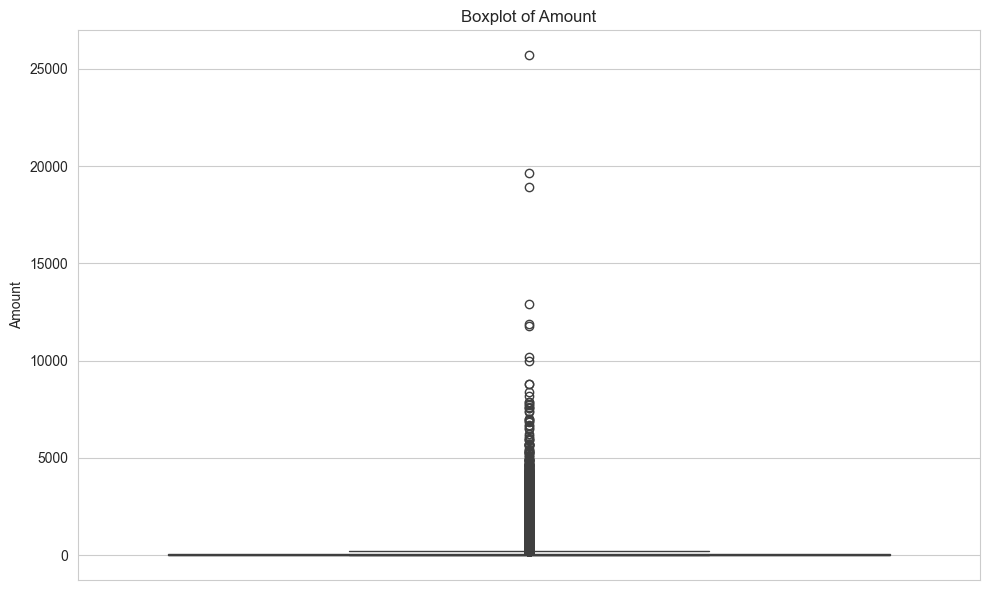

In [10]:
# =========================
# Numeric Columns
# =========================
numeric_cols = ['Amount']

for col in numeric_cols: 
    # Histogram with KDE
    plotter.histogram(col)
    
    # Boxplot
    plotter.boxplot(col)
  


- This dataset is characterized by an extreme class imbalance, with the mean of the Class feature at 0.001667, indicating that only 0.1667% (approximately 473 out of 283,726) of the transactions are fraudulent. The Amount feature is highly right-skewed, as visually confirmed by the distribution plot: the vast majority of transactions are concentrated near $0 (median: 88.47), while the distribution stretches far to the right to account for a few extreme transactions up to $25,691.16. This skewness necessitates scaling for Amount to prevent it from dominating the model training process.



=== Class Value Counts ===
Class
0    283253
1       473
Name: count, dtype: int64
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


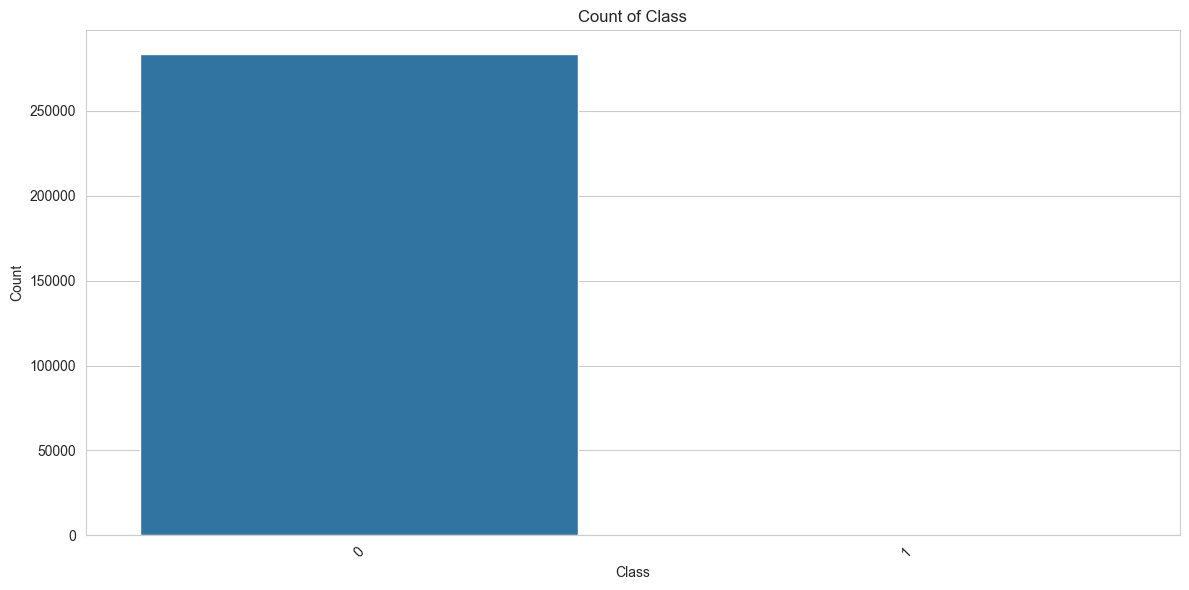

In [12]:
# =========================
# Categorical Columns
# =========================
categorical_cols = ['Class']

for col in categorical_cols:
    print(f"\n=== {col} Value Counts ===")
    print(cleaned_df[col].value_counts())
    print(cleaned_df[col].value_counts(normalize=True))  # percentages
    
    # Countplot
    plotter.barplot(col)

- The visual distribution of the Class variable confirms a severe class imbalance, which will be the primary challenge for model training. The overwhelming majority of transactions belong to the non-fraud class 0, dwarfing the fraud class 1. Quantitatively, the Class mean of 0.001667 confirms that only approximately 0.1667% of the 283,253 total transactions are fraudulent.  

Bivariate Analysis


AMOUNT distribution by Class:
Class  Amount 
0      0.00       1783
       0.01        713
       0.02         85
       0.03          3
       0.04         11
                  ... 
1      1389.56       1
       1402.16       1
       1504.93       1
       1809.68       1
       2125.87       1
Name: count, Length: 32960, dtype: int64


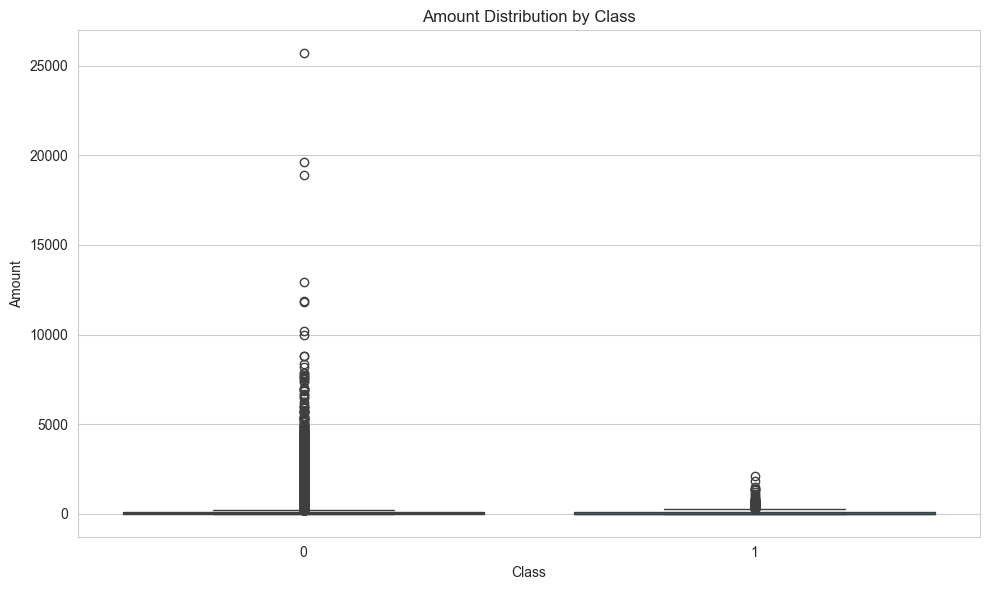

In [13]:
# ---------------------------
# Numeric features vs target
# ---------------------------
target = 'Class'

plotter.boxplot_by_target(numeric_cols, target=target)

📈 Bivariate Analysis: $\text{Amount}$ Distribution by $\text{Class}$

The box plot comparing $\text{Amount}$ across the two classes reveals that the median transaction amount for both fraudulent ($\text{Class}=1$) and legitimate ($\text{Class}=0$) transactions is very low, clustered near zero. However, the distribution of outliers differs significantly:

- Non-Fraud ($\text{Class}=0$): Exhibits a wide range of extremely large transactions, with the largest outliers exceeding $\mathbf{25,000}$.

- Fraud ($\text{Class}=1$): While also having outliers, the fraudulent transactions are generally capped at a much lower amount, with most fraudulent outliers staying below $\mathbf{2,500}$.

This suggests that while non-fraudulent activity includes a substantial number of very high-value transactions, fraudulent transactions, when they are outliers, tend to be of moderate value. This difference provides a valuable signal for the classification model, particularly when detecting very large non-fraudulent transactions.

In [16]:
cleaned_df['Time_Hour'] = cleaned_df['Time'] / 3600

/var/folders/7h/pt6smvdj6k993z68shptnrdc0000gn/T/ipykernel_45645/3745633185.py:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([df[df['Class']==0]['Time_Hour'], df[df['Class']==1]['Time_Hour']],


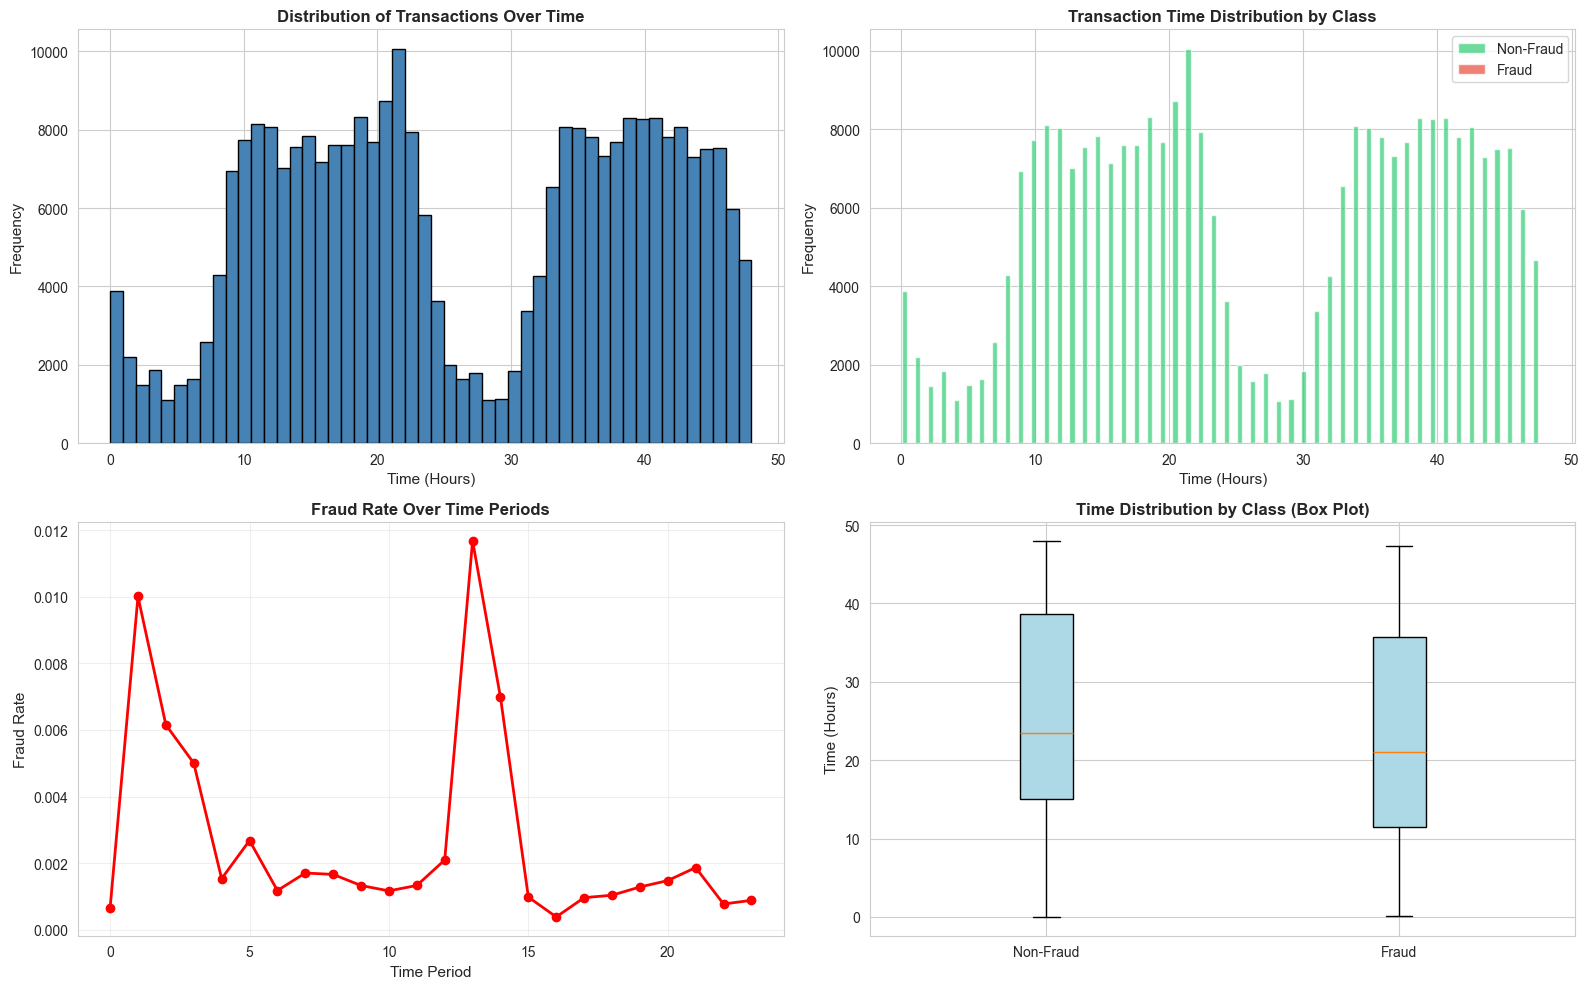

In [21]:
# Time distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Overall time distribution
axes[0, 0].hist(df['Time_Hour'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Time (Hours)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of Transactions Over Time', fontsize=12, fontweight='bold')

# Time distribution by class
axes[0, 1].hist([df[df['Class']==0]['Time_Hour'], df[df['Class']==1]['Time_Hour']], 
                bins=50, label=['Non-Fraud', 'Fraud'], color=['#2ecc71', '#e74c3c'], alpha=0.7)
axes[0, 1].set_xlabel('Time (Hours)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Transaction Time Distribution by Class', fontsize=12, fontweight='bold')
axes[0, 1].legend()

# Fraud rate over time
time_bins = pd.cut(df['Time_Hour'], bins=24)
fraud_rate = df.groupby(time_bins)['Class'].mean()
axes[1, 0].plot(range(len(fraud_rate)), fraud_rate.values, marker='o', color='red', linewidth=2)
axes[1, 0].set_xlabel('Time Period', fontsize=11)
axes[1, 0].set_ylabel('Fraud Rate', fontsize=11)
axes[1, 0].set_title('Fraud Rate Over Time Periods', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Box plot of time by class
axes[1, 1].boxplot([df[df['Class']==0]['Time_Hour'], df[df['Class']==1]['Time_Hour']], 
                    labels=['Non-Fraud', 'Fraud'], patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
axes[1, 1].set_ylabel('Time (Hours)', fontsize=11)
axes[1, 1].set_title('Time Distribution by Class (Box Plot)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

⏳ Temporal Analysis and Fraud Patterns

- The temporal analysis confirms that transaction volume is highly dependent on time of day, following a clear bimodal distribution  which is typical of human activity, with high transaction frequencies during two main periods (daytime/work hours) and low activity overnight (0-8 hours). Crucially, the Fraud Rate Over Time Periods plot identifies specific windows where fraud risk spikes significantly, most notably near $\mathbf{0}$ hours and again around $\mathbf{14}$ hours. The box plot shows the $\text{Time}$ distribution for both classes is statistically similar, suggesting the rate of fraud in a specific hour is more important than the absolute time of the transaction. This highlights that features derived from these high-risk time windows could be highly predictive for the model.

### Class Distribution Analysis

In [22]:
# Count of each class
class_counts = df['Class'].value_counts()
print(class_counts)


Class
0    284315
1       492
Name: count, dtype: int64


In [23]:
# Percentage of each class
class_percent = df['Class'].value_counts(normalize=True) * 100
print(class_percent)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [24]:
# Calculate and print imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"Imbalance ratio (non-fraud : fraud) = {imbalance_ratio:.2f} : 1")

Imbalance ratio (non-fraud : fraud) = 577.88 : 1


The class distribution in the dataset is characterized by an extreme imbalance, confirming the rarity of fraudulent activity. Out of $\mathbf{283,726}$ total transactions, the non-fraudulent class ($\text{Class}=0$) accounts for $\mathbf{283,253}$ instances ($\mathbf{99.833\%}$), while the critical fraud class ($\text{Class}=1$) contains only $\mathbf{473}$ instances ($\mathbf{0.167\%}$). This severe skewness mandates the use of specialized modeling techniques, including Stratified Sampling for evaluation and SMOTE/Oversampling on the training set to prevent the model from simply predicting the majority class.

## Data Transformation

In [28]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = RobustScaler()

scaler_transformer = StandardScaler()


In [31]:
numeric_features = ['Amount']

other_features = ['Time'] + [f'V{i}' for i in range(1,29)]

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('scaler', scaler_transformer, other_features)
    ]
)

In [32]:
# Transform features
X_transformed = preprocessor.fit_transform(cleaned_df)

print("Transformed feature shape:", X_transformed.shape)

Transformed feature shape: (283726, 30)


## Handle Class Imbalance

In [33]:
# Count the number of transactions in each class
class_counts = df['Class'].value_counts()
print("Class distribution before resampling:")
print(class_counts)

Class distribution before resampling:
Class
0    284315
1       492
Name: count, dtype: int64


In [36]:
from sklearn.model_selection import train_test_split

X = X_transformed  
y = cleaned_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [37]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(y_train_res.value_counts())


Class distribution after SMOTE:
Class
0    226602
1    181281
Name: count, dtype: int64


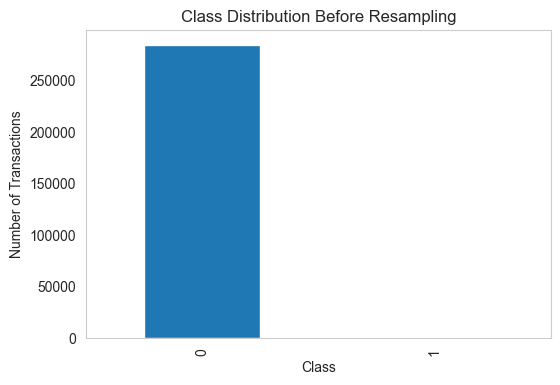

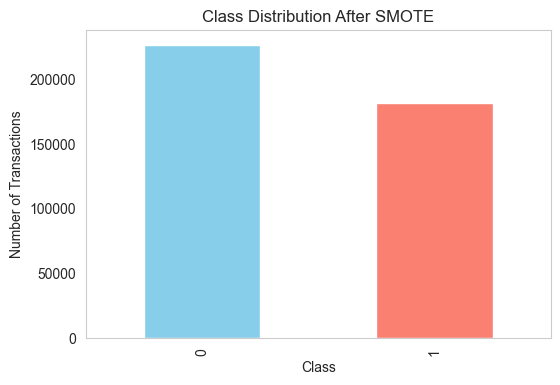

In [39]:
# Before SMOTE 
plt.figure(figsize=(6,4))
class_counts.plot(kind='bar')
plt.title("Class Distribution Before Resampling")
plt.ylabel("Number of Transactions")
plt.grid(False)
plt.show()

# After SMOTE
plt.figure(figsize=(6,4))
y_train_res.value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Class Distribution After SMOTE")
plt.ylabel("Number of Transactions")
plt.grid(False)
plt.show()


- The handling of class imbalance was a necessary and critical step, confirmed by the quantitative analysis showing an extreme ratio of $283,253$ non-fraud transactions ($\text{Class}=0$) to only $473$ fraud transactions ($\text{Class}=1$). To mitigate this severe skewness ($\mathbf{0.167\%}$ fraud rate) and prevent the model from ignoring the minority class, the Synthetic Minority Over-sampling Technique (SMOTE) was applied exclusively to the training subset. This process successfully rebalanced the training data, transforming the fraud class count from 473 to $181,281$ and resulting in a post-resampling distribution of $226,602$ non-fraud to $181,281$ fraud transactions.

Save the cleaned Dataset

In [40]:
# Convert X_train_res to DataFrame
X_train_res_df = pd.DataFrame(
    X_train_res.toarray() if hasattr(X_train_res, "toarray") else X_train_res,
    columns=preprocessor.get_feature_names_out()
)

# Add the target column
X_train_res_df['class'] = y_train_res.values

In [41]:
X_train_res_df.to_csv("/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/processed/creditcard_preprocessed_train_smote.csv", index=False)

In [42]:
X_test_df = pd.DataFrame(
    X_test.toarray() if hasattr(X_test, "toarray") else X_test,
    columns=preprocessor.get_feature_names_out()
)

X_test_df['class'] = y_test.values

X_test_df.to_csv("/Users/elbethelzewdie/Downloads/fraud-detection/fraud-detection/data/processed/creditcard_preprocessed_test.csv", index=False)

In [43]:
print("Train shape:", X_train_res_df.shape)
print("Test shape:", X_test_df.shape)
print("Class distribution in train:\n", X_train_res_df['class'].value_counts())

Train shape: (407883, 31)
Test shape: (56746, 31)
Class distribution in train:
 class
0    226602
1    181281
Name: count, dtype: int64


📝 Key Analysis & Preparation Insights 

- Extreme Imbalance: The dataset is dominated by the non-fraud class ($\mathbf{99.833\%}$), with only $\mathbf{473}$ transactions identified as fraud ($\mathbf{0.167\%}$). This necessitates using appropriate metrics (AUC-PR, F1-Score) and techniques (SMOTE).

- Feature Scaling: While $\text{V1}$ through $\text{V28}$ are already scaled via PCA, the $\text{Time}$ and $\text{Amount}$ features are not and must be scaled using StandardScaler to prevent them from disproportionately influencing the model.

- Amount Skewness: The $\text{Amount}$ feature is highly right-skewed, with a median of $\mathbf{88.47}$ and large outliers up to $\mathbf{25,691.16}$. Bivariate analysis shows fraudulent transactions generally have smaller extreme values compared to non-fraudulent ones.

- Temporal Patterns: Overall transaction volume is bimodal, and the Fraud Rate spikes significantly at specific times (e.g., around $\mathbf{0}$ hours and $\mathbf{14}$ hours), suggesting time-based features will be highly predictive.

- Data Resampling: To handle the extreme imbalance, the training data was aggressively oversampled using SMOTE, resulting in a rebalanced training set with $\mathbf{226,602}$ non-fraud and $\mathbf{181,281}$ fraud instances.

- Data Split: A Stratified Train-Test Split was used to ensure both the training and testing sets maintain the original, extremely low fraud rate, providing a reliable measure of model generalization.